In [14]:
import sympy as sp
import networkx as nx
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import tqdm

import linearframework.graph_operations as g_ops
import linearframework.ca_recurrence as ca
import linearframework.linear_framework_results as lfr
import linearframework.gen_graphs as gen

In [17]:
p = 3
p3_edge_to_weight = gen.gen_core_butterfly_dict(5, p)

p3_edge_to_sym = g_ops.edge_to_sym_from_edge_to_weight(p3_edge_to_weight)

terminal_vertices = [f'p_{p}', f'p_bar_{p}']

# correct = lfr.splitting_probability(p3_edge_to_sym, [f'p_{p}', f'p_bar_{p}'], '1', f'p_{p}')
# incorrect = lfr.splitting_probability(p3_edge_to_sym, [f'p_{p}', f'p_bar_{p}'], '1', f'p_bar_{p}')

# splitting_ratio = incorrect / correct
# splitting_ratio

In [18]:
graph = nx.DiGraph()
graph.add_edges_from(p3_edge_to_sym.keys())

sym_lap = ca.generate_sym_laplacian(graph, p3_edge_to_sym)
n = sym_lap.rows
m = len(terminal_vertices)
Q_n_minus_2 = ca.get_sigma_Q_k(sym_lap, n-m)[1]
print('Q')
correct = lfr.sum_sym_weights_jq_roots_ij_path(graph, sym_lap, Q_n_minus_2, terminal_vertices, '1', f'p_{p}')
print('c')
incorrect = lfr.sum_sym_weights_jq_roots_ij_path(graph, sym_lap, Q_n_minus_2, terminal_vertices, '1', f'p_bar_{p}')
print('i')

splitting_ratio = incorrect / correct

Q
c
i


In [19]:
expression = splitting_ratio
num_samples = 2000

datapoints = []
for i in tqdm.tqdm(range(num_samples)):
    new_edge_to_weight = gen.gen_core_butterfly_dict(5, p)
    new_sym_to_weight = g_ops.make_sym_to_weight(new_edge_to_weight, p3_edge_to_sym)
    new_datapoint = expression.subs(new_sym_to_weight)
    datapoints.append(new_datapoint)

min(datapoints)

100%|██████████| 2000/2000 [1:30:46<00:00,  2.72s/it]    


0.201269218041148

In [ ]:
neq_datapoints = []
for i in tqdm.tqdm(range(num_samples)):
    new_edge_to_weight = gen.gen_core_butterfly_dict(5, 5, equilibrium=False)
    new_sym_to_weight = g_ops.make_sym_to_weight(new_edge_to_weight, p3_edge_to_sym)
    new_datapoint = expression.subs(new_sym_to_weight)
    neq_datapoints.append(new_datapoint)

min(neq_datapoints)

100%|██████████| 5000/5000 [07:15<00:00, 11.48it/s]


0.0495738755203668

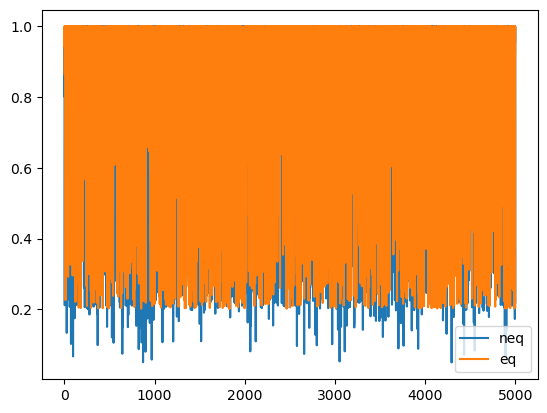

In [ ]:
plt.plot(neq_datapoints, label='neq')
plt.plot(datapoints, label='eq')
plt.legend()
plt.show()